In [1]:
print('hi')

hi


In [1]:
import pandas as pd
names1880 = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1880.txt',
                        names = ['name', 'sex', 'births'])

names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [2]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [3]:
#pandas concat
import pandas as pd
from collections import deque
years = range(1880, 2011) #from 1880 to 2010
pieces = deque()
columns = ['name', 'sex', 'births']

for year in years:
    path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
pieces

deque([           name sex  births  year
       0          Mary   F    7065  1880
       1          Anna   F    2604  1880
       2          Emma   F    2003  1880
       3     Elizabeth   F    1939  1880
       4        Minnie   F    1746  1880
       ...         ...  ..     ...   ...
       1995     Woodie   M       5  1880
       1996     Worthy   M       5  1880
       1997     Wright   M       5  1880
       1998       York   M       5  1880
       1999  Zachariah   M       5  1880
       
       [2000 rows x 4 columns],
                  name sex  births  year
       0          Mary   F    6919  1881
       1          Anna   F    2698  1881
       2          Emma   F    2034  1881
       3     Elizabeth   F    1852  1881
       4      Margaret   F    1658  1881
       ...         ...  ..     ...   ...
       1930     Wiliam   M       5  1881
       1931     Wilton   M       5  1881
       1932       Wing   M       5  1881
       1933       Wood   M       5  1881
       1934     W

In [4]:
#Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index = True)
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


Remember that 'concat' glues the Data Frame objects together row-wise by default.
You have to pass ignore_index = True because we're not interested in preserving row numbers returned from read_csv

In [5]:
total_births = names.pivot_table('births', index = 'year',
                                 columns = 'sex', aggfunc = sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

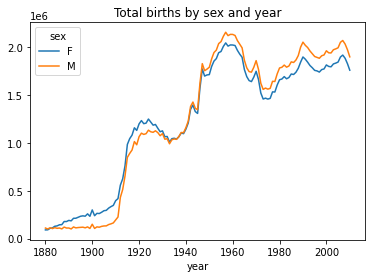

In [6]:
total_births.plot(title = 'Total births by sex and year')

<AxesSubplot:xlabel='name', ylabel='prop'>

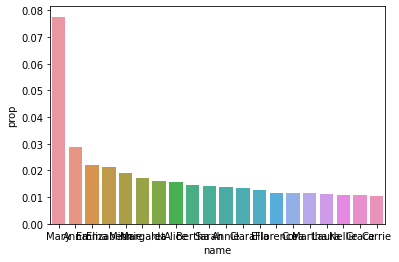

In [14]:
#Find most famous names
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

import seaborn as sns
sns.barplot(y = 'prop', x = 'name', data = names[:20])

In [8]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [9]:
#Top 1000 names

def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [20]:
#Drop the group index, not needed
top1000.reset_index(inplace  =True, drop = True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [23]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by = 'births', ascending = False)[:1000])
top1000 = pd.concat(pieces, ignore_index = True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


Analyzing Naming Trends

In [25]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [28]:
total_births = top1000.pivot_table('births', index = 'year',
                                  columns = 'name', aggfunc = sum)
total_births = total_births.fillna(0)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,71.0,...,8.0,23.0,0.0,0.0,7.0,0.0,8.0,28.0,27.0,0.0
1881,0.0,0.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,81.0,...,0.0,22.0,0.0,0.0,10.0,0.0,9.0,21.0,27.0,0.0
1882,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,80.0,...,8.0,25.0,0.0,0.0,9.0,0.0,17.0,32.0,21.0,0.0
1883,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,79.0,...,0.0,23.0,0.0,0.0,10.0,0.0,11.0,35.0,25.0,0.0
1884,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,98.0,...,13.0,31.0,0.0,0.0,14.0,6.0,8.0,58.0,27.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0.0,3737.0,0.0,8279.0,0.0,0.0,297.0,0.0,404.0,440.0,...,0.0,5145.0,2839.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,3941.0,0.0,8914.0,0.0,0.0,313.0,0.0,349.0,468.0,...,0.0,4925.0,3028.0,526.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,955.0,4028.0,219.0,8511.0,0.0,0.0,317.0,0.0,344.0,400.0,...,0.0,4764.0,3438.0,492.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


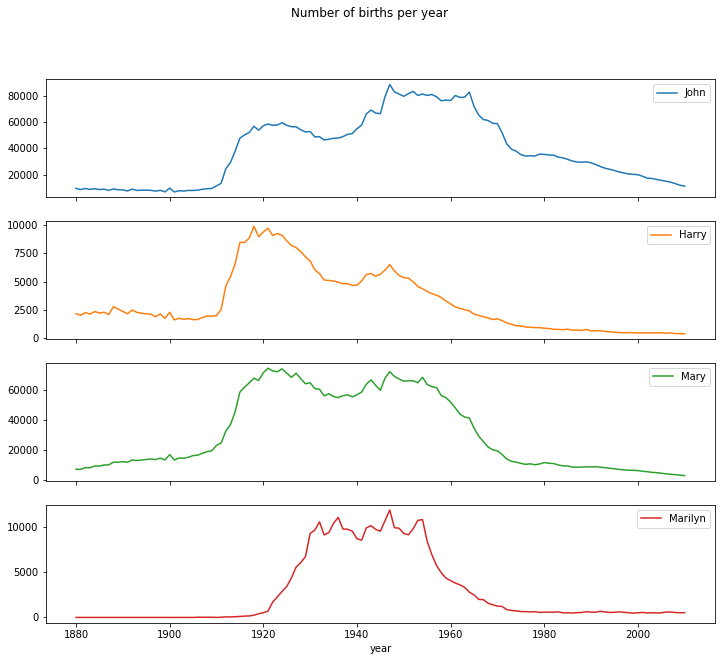

In [37]:
subset = total_births[['John', 'Harry','Mary', 'Marilyn']]

subset.plot(subplots = True, figsize = (12,10), grid = False,
            title = "Number of births per year")
import matplotlib.pyplot as plt
plt.savefig('YourName')

In [39]:
#Measuring the increase in naming diversity
table = top1000.pivot_table('prop', index = 'year',
                            columns = 'sex', aggfunc = sum)
table.tail()

sex,F,M
year,,
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003
2009,0.737290,0.845256
2010,0.736780,0.843156


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

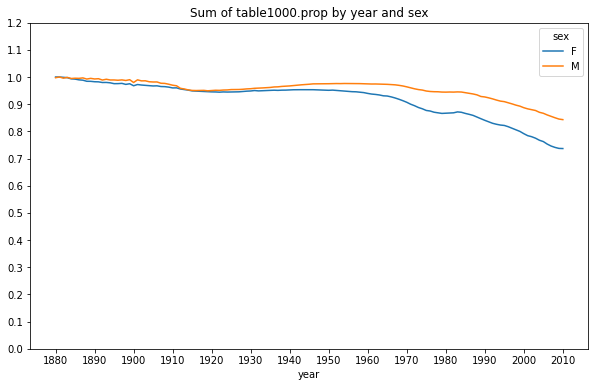

In [47]:
import numpy as np
table.plot(title = 'Sum of table1000.prop by year and sex', figsize = (10,6),
           yticks = np.linspace(0, 1.2, 13), xticks = range(1880, 2020, 10))

You can see that, indeed, there appears to be increasing name diversity (decreasing total proportions in the top 1,000)

In [59]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [60]:
#Want to know how many of the most popular names it takes to reach 50%
#Cumulative sum
prop_sumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_sumsum[:10]
#And searchsorted
print(prop_sumsum.values.searchsorted(0.5) + 1, #Zero index
      len(df))

117 1000


In [61]:
df = boys[boys.year == 1990]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

45

In [62]:
in1900

220877    0.031806
220878    0.057299
220879    0.079125
220880    0.100181
220881    0.116650
            ...   
221872    0.926368
221873    0.926422
221874    0.926477
221875    0.926531
221876    0.926585
Name: prop, Length: 1000, dtype: float64

In [65]:
#Anotherway
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:title={'center':'Number of popular names in to 50%'}, xlabel='year'>

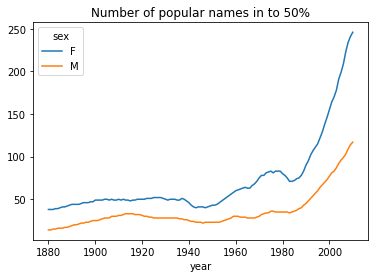

In [66]:
diversity.plot(title = 'Number of popular names in to 50%')

In [70]:
#The last letter revolution
get_last_letter = lambda x: x[-1]
last_letters  =names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [72]:
table = names.pivot_table('births', index = last_letters,
                          columns = ['sex', 'year'], aggfunc = sum)
subtable = table.reindex(columns = [1910, 1960, 2010], level  ='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [74]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [75]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

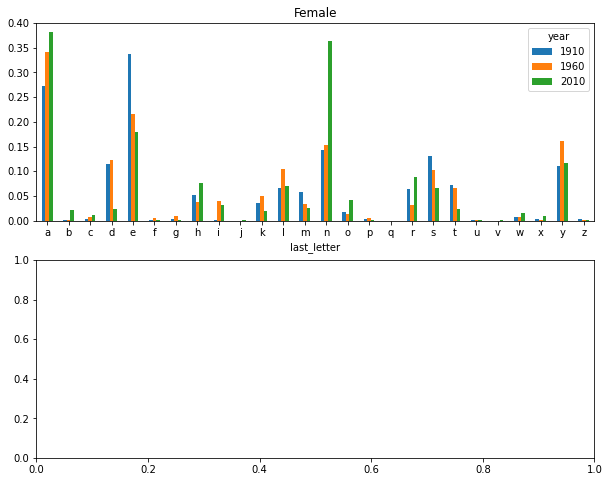

In [80]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize = (10,8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Female', legend = False)

In [82]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<AxesSubplot:xlabel='year'>

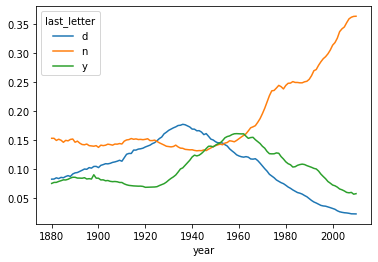

In [83]:
dny_ts.plot()

Boy names that became girl names (and vice versa)

In [85]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [87]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [94]:
table = filtered.pivot_table('births', index = 'year',
                             columns = 'sex', aggfunc = sum)
#Let's aggregate by sex and year and normalize within year
table = table.div(table.sum(1), axis = 0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


In [95]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

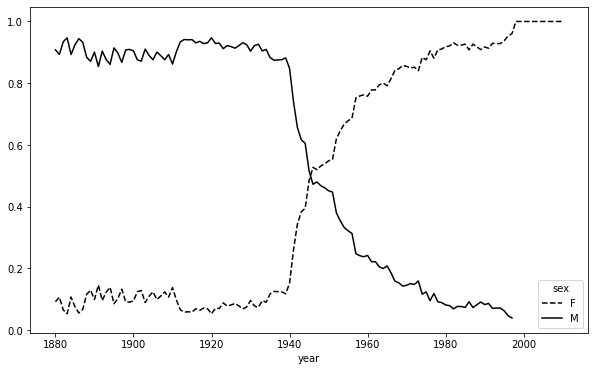

In [97]:
table.plot(figsize = (10,6),style = {'M': 'k-', 'F': 'k--'})

In [1]:
print('gi')

gi
